<a href="https://colab.research.google.com/github/HikariReiziq/Statistika-dan-Probabilitas/blob/main/fpstatprob.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 😴Mohon Perlu Diperhatikan teman-teman 🧑‍💻
**Sebelum mengerjakan, tekan "run all" biar tidak error codingannya. Caranya adalah tekan ctrl+f9 ⌚**

**Terakhir kalau udah selesai coding, di save dlu ctrl + s** 🫡

**Note: Barusan kita nanya ke bu Hafara untuk membuat analisis dan ngolah data sekreatif mungkin juga jelas kualitas dari analisis data tersebut.**

**Mata Kuliah**: Statistika dan Probabilitas

**Dosen**: Hafara Firdausi, S.Kom., M.Kom.

**Kelompok 1 Kelas A**

| Anggota                    | NRP          |
|----------------------------|--------------|
| Ahmad Rabbani Fata         | 5027241046   |
| M. Hikari Reiziq R.        | 5027241079   |
| Raihan Fahri Ghazali       | 5027241061   |
| M. Faqih Ridho             | 5027241123   |





**Tujuan Final Projek:**

Tugas ini bertujuan untuk mengidentifikasi faktor-faktor utama yang mempengaruhi perilaku pembelian pelanggan dan mengusulkan strategi yang efektif untuk meningkatkan penjualan dan loyalitas pelanggan.

# Table of Content

1. Import Dataset Shopping Trends (Hikari)
  - Data Cleaning
    - Ringkasan
2. Analisis Tren Belanja (Raihan)
  - Fashion yang Memiliki Rating Terbanyak
    - Analisis Tren Fashion Rating Berdasarkan Jumlah Pembelian
    - Analisis Tren Fashio Rating Terbanyak Berdasarkan Pembelian Sebelumnya
3. Analisis Tren Belanja berdasarkan Musim  
4. Distribusi Rating (Hikari)
  - Proporsi Rating
5. Analisis Korelasi Purchase Amount dengan Beberapa Variabel (Mamet)
  - Uji Spearman vs Pearson
6. Kesimpulan
7. Referensi
8. Export to PDF (Mamet)


# Import dataset (Bagian Hikari)

In [1]:
from google.colab import drive
drive.mount('/content/drive')
!cp "/content/drive/MyDrive/Colab Notebooks/shopping_trends.csv" -r ./

Mounted at /content/drive


In [3]:
import pandas as pd

# Baca file CSV
file_path = './shopping_trends.csv'
df = pd.read_csv(file_path)

# Menampilkan tabel
df


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


## Data Cleaning (DONE)

In [ ]:
# 1. Melihat informasi awal dataset
print("Informasi Dataset:")
print(df.info())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   ob

In [ ]:
# 2.Menghapus Duplikat
df = df.drop_duplicates()

# Jumlah baris sebelum menghapus duplikat
before_dropping = len(df)
# Jumlah baris setelah menghapus duplikat
after_dropping = len(df)

# Jumlah data yang dibuang
data_dibuang = before_dropping - after_dropping
print(f"Jumlah data duplikat yang dibuang: {data_dibuang}")


Jumlah data duplikat yang dibuang: 0


In [ ]:
# 3. menghapus baris yang memiliki nilai NaN


# Setelah menangani nilai yang hilang
df.fillna('Unknown', inplace=True)

# Menampilkan jumlah baris dan kolom
rows, cols = df.shape
print(f"Jumlah baris setelah penanganan nilai hilang: {rows}")
print(f"Jumlah kolom setelah penanganan nilai hilang: {cols}")



Jumlah baris setelah penanganan nilai hilang: 3900
Jumlah kolom setelah penanganan nilai hilang: 19


In [ ]:
# 4. Menghapus data dengan angka negatif pada kolom tertentu
numeric_columns = ['Purchase Amount (USD)', 'Age', 'Review Rating', 'Previous Purchases']
for col in numeric_columns:
    df = df[df[col] >= 0]

rows, cols = df.shape
print(f"Jumlah baris saat ini: {rows}")
print(f"Jumlah kolom saat ini: {cols}")


Jumlah baris saat ini: 3900
Jumlah kolom saat ini: 19


In [ ]:
# 5. Memeriksa nilai unik untuk menemukan data tidak wajar / outlier
unique_values = {col: df[col].unique() for col in df.columns}

rows, cols = df.shape
print(f"Jumlah baris saat ini: {rows}")
print(f"Jumlah kolom saat ini: {cols}")

Jumlah baris saat ini: 3900
Jumlah kolom saat ini: 19


### **Ringkasan**
Berdasarkan proses cleaning yang kita lakukan, dapat diringkas bahwa :

**1. Jumlah Baris dan Kolom**
- Total baris: 3,900
- Total kolom: 19

Note : Tidak ada perubahan data dari awal hingga akhir *cleaning*

**2. Pemeriksaan NaN**
- Tidak ditemukan nilai NaN pada dataset ini.

**3. Pemeriksaan Nilai Unik**
**Nilai di setiap kolom tampak wajar, seperti:**
- Umur (Age): 18 hingga 70 tahun.
- Jumlah Pembelian Sebelumnya (Previous Purchases): 1 hingga 50 kali.
- Rating Ulasan (Review Rating): 2.5 hingga 5.0.
- Jumlah Pembelian (Purchase Amount): 20 USD hingga 100 USD.

**4. Pemeriksaan Data Duplikat**
- Tidak ditemukan data duplikat pada dataset ini.

**5. Kondisi Data yang Perlu Diperiksa Lebih Lanjut**
**Data Tidak Wajar:**
- Tidak ada angka negatif dalam kolom numerik, sehingga data tampak valid.


**Sehingga dataset ini tidak memiliki elemen yang dapat merusak analisis ke depannya, kita dapat langsung melanjutkan ke eksplorasi data atau pengembangan model analitik tanpa khawatir tentang kualitas data kita.**

# Analisis Popularitas (Bagian Raihan)

Mengidentfikasi pakaian-pakaian yang paling populer berdasarkan jumlah rating dan rata-rata rating.

## Fashion yang Memiliki Rating Terbanyak



In [ ]:
# Membaca data dari file
file_path = '/content/drive/MyDrive/Data FP ATP/shopping_trends.csv'
df = pd.read_csv(file_path)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Data FP ATP/shopping_trends.csv'

In [ ]:
# Mengelompokkan data berdasarkan "Item Purchased" (SBN)
item_group = df.groupby('Item Purchased').size().sort_values(ascending=False).reset_index(name='Count')

print(item_group)

   Item Purchased  Count
0         Jewelry    171
1          Blouse    171
2           Pants    171
3           Shirt    169
4           Dress    166
5         Sweater    164
6          Jacket    163
7            Coat    161
8      Sunglasses    161
9            Belt    161
10        Sandals    160
11          Socks    159
12          Skirt    158
13          Scarf    157
14         Shorts    157
15            Hat    154
16        Handbag    153
17         Hoodie    151
18          Shoes    150
19        T-shirt    147
20       Sneakers    145
21          Boots    144
22       Backpack    143
23         Gloves    140
24          Jeans    124


In [ ]:
# Menampilkan jumlah baris dan kolom, serta nama kolom
total_rows, total_columns = df.shape
print(f"Jumlah Baris: {total_rows}, Jumlah Kolom: {total_columns}")
print("Kolom yang tersedia:")
print(df.columns.tolist())

Jumlah Baris: 3900, Jumlah Kolom: 19
Kolom yang tersedia:
['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category', 'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season', 'Review Rating', 'Subscription Status', 'Payment Method', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Previous Purchases', 'Preferred Payment Method', 'Frequency of Purchases']


Fashion yang memiliki jumlah rating terbanyak:

1. Jewerly (171)
2. Blouse (171)
3. pants (171)



Karena ketiga item tersebut memiliki jumlah rating yang sama, urutan peringkat untuk posisi 1 hingga 3 dapat disesuaikan.

### Analisis Tren Fashion Rating Terbanyak Berdasarkan Jumlah Pembelian

---




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Muat kumpulan data
df = pd.read_csv("/shopping_trends.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/shopping_trends.csv'

In [ ]:
# Filter item yang relevan dan hitung jumlah total pembelian berdasarkan Item yang Dibeli
filtered_df = df[df['Item Purchased'].isin(['Blouse', 'Pants', 'Jewelry'])]
purchase_count = filtered_df.groupby('Item Purchased')['Purchase Amount (USD)'].count().reset_index()
purchase_count.rename(columns={'Purchase Amount (USD)': 'Purchase Count'}, inplace=True)

In [ ]:
# Urutkan data berdasarkan jumlah pembelian dalam urutan menurun
purchase_count_sorted = purchase_count.sort_values(by='Purchase Count', ascending=False)
print(purchase_count)

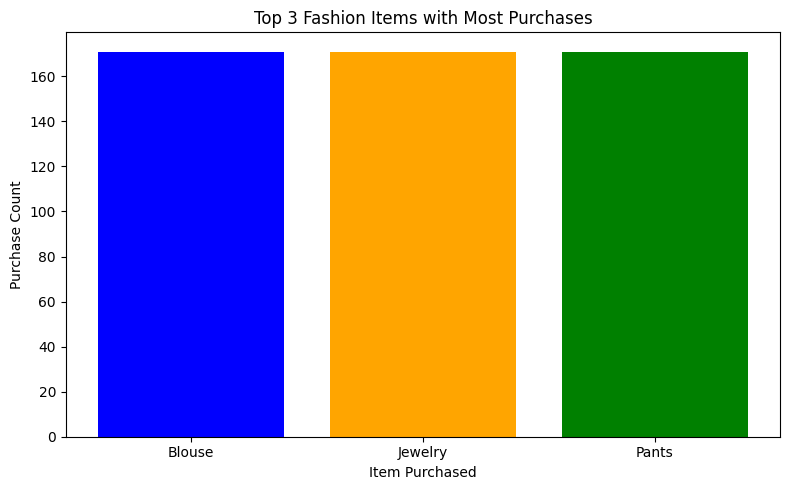

In [ ]:
# Merencanakan data
plt.figure(figsize=(8, 5))
plt.bar(purchase_count_sorted['Item Purchased'], purchase_count_sorted['Purchase Count'], color=['blue', 'orange', 'green'])
plt.title('Top 3 Shopping Items with Most Purchases')
plt.xlabel('Item Purchased')
plt.ylabel('Purchase Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
# Tampilkan tabel
purchase_count_sorted

,Item Purchased,Purchase Count
0,Blouse,171
1,Jewelry,171
2,Pants,171


## Analisis Tren Fashion Rating Terbanyak Berdasarkan Pembelian Sebelumnya

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Muat kumpulan data
file_path = '/content/shopping_trends.csv'
df = pd.read_csv(file_path)

In [ ]:
# Filter item yang relevan dan hitung peringkat rata-rata berdasarkan Pembelian Sebelumnya untuk item teratas
filtered_df = df[df['Item Purchased'].isin(['Blouse', 'Pants', 'Jewelry'])]
rating_analysis = filtered_df.groupby('Item Purchased')['Review Rating'].mean().reset_index()
rating_analysis.rename(columns={'Review Rating': 'Average Rating'}, inplace=True)

In [ ]:
# Urutkan data berdasarkan peringkat rata-rata dalam urutan menurun
rating_analysis_sorted = rating_analysis.sort_values(by='Average Rating', ascending=False)

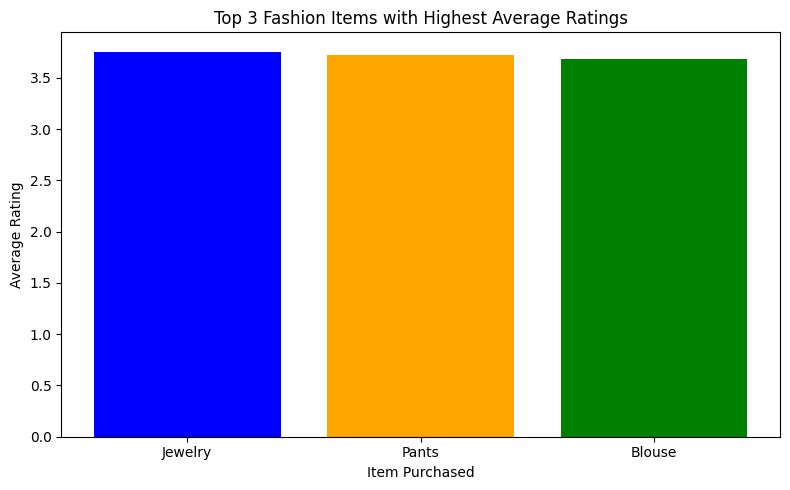

In [ ]:
# Merencanakan data
plt.figure(figsize=(8, 5))
plt.bar(rating_analysis_sorted['Item Purchased'], rating_analysis_sorted['Average Rating'], color=['blue', 'orange', 'green'])
plt.title('Top 3 Shopping Items with Highest Average Ratings')
plt.xlabel('Item Purchased')
plt.ylabel('Average Rating')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Tampilkan tabel
rating_analysis_sorted

,Item Purchased,Average Rating
1,Jewelry,3.756140
2,Pants,3.718713
0,Blouse,3.683626


## Fashion yang Memiliki Rata - Rata Rating Terbaik


Kali ini, kami menggunakan metode **"Bayesian Average"** karena metode ini dikenal efektif dalam menghasilkan penilaian yang lebih adil dan representatif, terutama dalam berbagai konteks,termasuk untuk pengolahan data yang kami gunakan saat ini.

In [ ]:
# Fungsi Bayesian Average
def bayesian_average(row, global_avg, global_cnt):
    """
    Menghitung Bayesian Average untuk setiap baris dalam DataFrame.

    Parameters:
        row (pd.Series): Baris dari DataFrame.
        global_avg (float): Rata-rata global.
        global_cnt (int): Jumlah total rating global.
    """
    rating_avg = row["rating_average"]
    rating_cnt = row["rating_count"]
    return (global_cnt * global_avg + rating_cnt * rating_avg) / (global_cnt + rating_cnt)


In [ ]:
# Membaca dataset dan menangani potensi error parsing file
def load_csv_with_error_handling(file_path, delimiter, encoding):
    try:
        return pd.read_csv(file_path, delimiter=delimiter, encoding=encoding, on_bad_lines='skip')
    except FileNotFoundError:
        print(f"File not found: {file_path}")
        return pd.DataFrame()
    except pd.errors.ParserError as e:
        print(f"Error parsing CSV file: {e}")
        return pd.DataFrame()
    except Exception as e:
        print(f"An error occurred: {e}")
        return pd.DataFrame()

In [ ]:
# Tambahkan kolom untuk memetakan "Review Rating" sebagai rating_average dan "Previous Purchases" sebagai rating_count
rating_data = df.rename(columns={"Review Rating": "rating_average", "Previous Purchases": "rating_count"})

In [ ]:
# Buat DataFrame baru untuk menghitung summary
rating_summary = rating_data.groupby("Item Purchased").agg(
    rating_average=("rating_average", "mean"),
    rating_count=("rating_count", "sum")
).reset_index()

def show_df(df):
    print(df)

show_df(rating_summary)

   Item Purchased  rating_average  rating_count
0        Backpack        3.752448          3370
1            Belt        3.761491          3877
2          Blouse        3.683626          4563
3           Boots        3.812500          3796
4            Coat        3.730435          4317
5           Dress        3.754819          4407
6          Gloves        3.864286          3702
7         Handbag        3.775163          3781
8             Hat        3.806494          3901
9          Hoodie        3.719205          3673
10         Jacket        3.763190          3769
11          Jeans        3.648387          2663
12        Jewelry        3.756140          4943
13          Pants        3.718713          4302
14        Sandals        3.841250          3869
15          Scarf        3.700000          4205
16          Shirt        3.629586          4338
17          Shoes        3.747333          3790
18         Shorts        3.711465          4088
19          Skirt        3.782278       

In [ ]:
# Parameter global
global_average = rating_summary["rating_average"].mean()  # Rata-rata global
global_count = rating_summary["rating_count"].sum()       # Jumlah total rating global

In [ ]:
# Hitung Bayesian Average untuk setiap item
rating_summary["bayesian_average"] = rating_summary.apply(
    lambda row: bayesian_average(row, global_average, global_count), axis=1
)

In [ ]:
# Urutkan berdasarkan Bayesian Average
sorted_summary = rating_summary.sort_values(by="bayesian_average", ascending=False)

In [ ]:
# Tampilkan hasil teratas
print(sorted_summary.head())

   Item Purchased  rating_average  rating_count  bayesian_average
6          Gloves        3.864286          3702          3.754606
14        Sandals        3.841250          3869          3.753916
3           Boots        3.812500          3796          3.752791
8             Hat        3.806494          3901          3.752624
19          Skirt        3.782278          3925          3.751712


### **Rating Average vs Bayesian Average**
Fashion yang Memiliki Jumlah Rating Terbaik :
1. Gloves  (3.864286)
2. Sandals (3.841250)
3. Boots (3.812500)

## Analisis Tren Fashion yang Memiliki Rating Terbaik Berdasarkan Musim

Kali ini, kami akan melakukan analisis mendalam terhadap tren fashion yang memiliki rating terbaik sepanjang waktu. Analisis ini akan dilakukan dengan memanfaatkan data yang mencakup informasi mengenai ***season*** (musim), ***category*** (kategori fashion), dan ***review rating*** (penilaian dari pengguna).

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Muat kumpulan data
file_path = '/content/shopping_trends.csv'
df = pd.read_csv(file_path)

FileNotFoundError: [Errno 2] No such file or directory: '/content/shopping_trends.csv'

In [ ]:
# Filter df untuk 3 kategori teratas
top_categories = ['Gloves', 'Sandals', 'Boots']
filtered_df = df[df['Item Purchased'].isin(top_categories)]

In [ ]:
# Hitung rating rata-rata per musim untuk 3 kategori teratas
top_season_ratings = (
    filtered_df.groupby(['Season', 'Item Purchased'])['Review Rating']
    .mean()
    .reset_index()
    .sort_values(by='Review Rating', ascending=False)
)

In [ ]:
# Tampilkan peringkat rata-rata untuk 3 kategori teratas berdasarkan musim
print("\nTop 3 Categories Average Ratings by Season:")
print(top_season_ratings)


Top 3 Categories Average Ratings by Season:
    Season Item Purchased  Review Rating
4   Spring         Gloves       3.959524
5   Spring        Sandals       3.904545
9   Winter          Boots       3.887097
7   Summer         Gloves       3.862069
2     Fall        Sandals       3.850000
10  Winter         Gloves       3.831250
0     Fall          Boots       3.825714
3   Spring          Boots       3.820000
8   Summer        Sandals       3.805000
11  Winter        Sandals       3.787500
1     Fall         Gloves       3.786486
6   Summer          Boots       3.731579


Berikut merupakan visualisasi

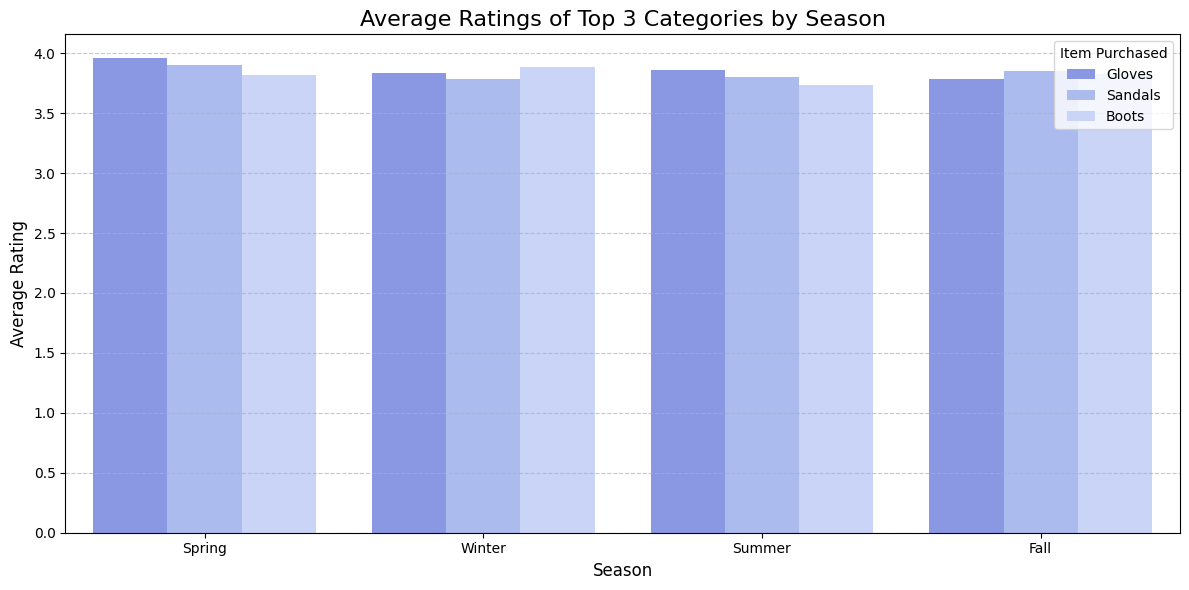

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasikan peringkat rata-rata berdasarkan musim untuk 3 kategori teratas
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_season_ratings,
    x='Season',
    y='Review Rating',
    hue='Item Purchased',
    palette=['#7B8DF1', '#A1B5F8', '#C1D0FF']  # Warna biru dari gambar
)
plt.title('Average Ratings of Top 3 Categories by Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.legend(title='Item Purchased', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Analisis Tren Fashion Rating Terbaik Berdasarkan Umur

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Muat kumpulan data
file_path = '/content/drive/MyDrive/Data FP ATP/shopping_trends.csv'
data = pd.read_csv(file_path)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Data FP ATP/shopping_trends.csv'

In [ ]:
# Filter data for the top 3 categories
top_categories = ['Gloves', 'Sandals', 'Boots']
filtered_data = data[data['Item Purchased'].isin(top_categories)]

In [ ]:
# Hitung peringkat rata-rata untuk 3 kategori teratas
top_ratings = (
    filtered_data.groupby('Item Purchased')['Review Rating']
    .mean()
    .reset_index()
    .sort_values(by='Review Rating', ascending=False)
)

In [ ]:
# Hitung peringkat rata-rata untuk 3 kategori teratas
top_ratings = (
    filtered_data.groupby('Item Purchased')['Review Rating']
    .mean()
    .reset_index()
    .sort_values(by='Review Rating', ascending=False)
)

In [ ]:
# Tampilkan peringkat rata-rata untuk 3 kategori teratas
print("\nTop 3 Average Ratings:")
print(top_ratings)


Top 3 Average Ratings:
  Item Purchased  Review Rating
1         Gloves       3.864286
2        Sandals       3.841250
0          Boots       3.812500


<ipython-input-68-fc0fcf6a7ba8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_ratings, x='Item Purchased', y='Review Rating', palette='coolwarm')


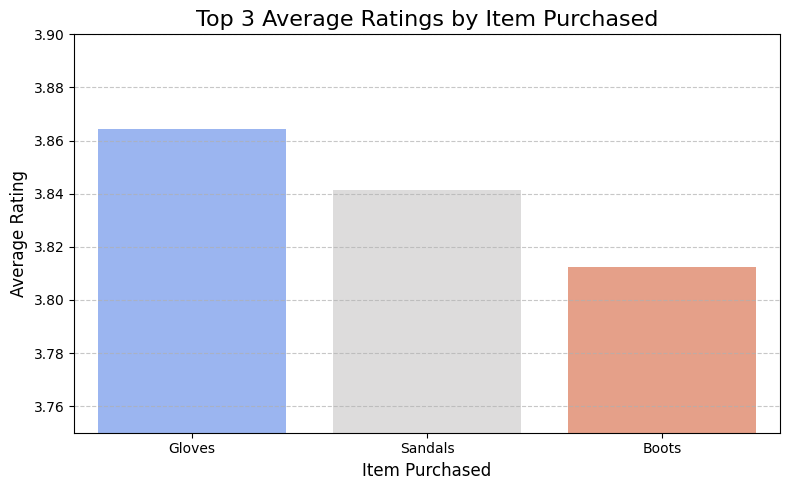

In [ ]:
# Visualisasikan peringkat rata-rata untuk 3 kategori teratas
plt.figure(figsize=(8, 5))
sns.barplot(data=top_ratings, x='Item Purchased', y='Review Rating', palette='coolwarm')
plt.title('Top 3 Average Ratings by Item Purchased', fontsize=16)
plt.xlabel('Item Purchased', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.ylim(3.75, 3.9)  # Set y-axis limits for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


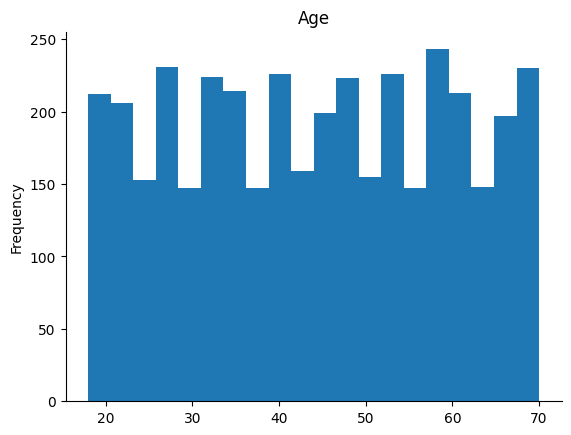

In [ ]:
# @title Age

from matplotlib import pyplot as plt
df['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

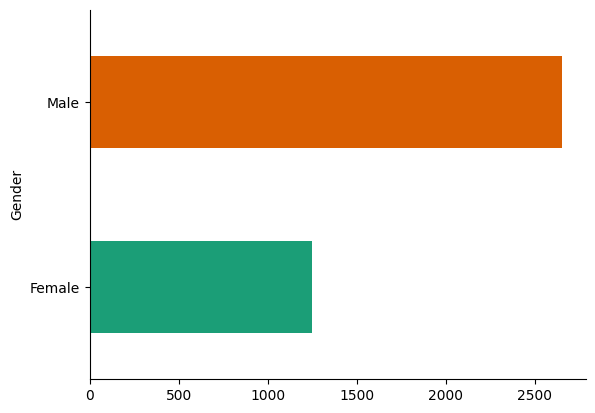

In [ ]:
# @title Gender

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

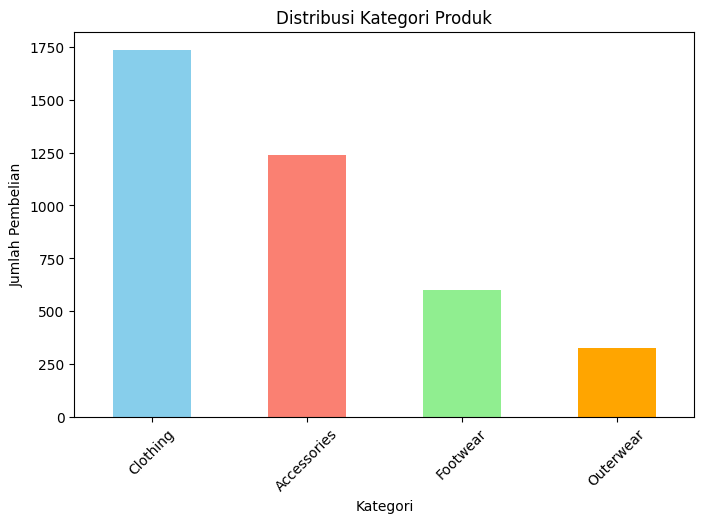

Kategori dengan pembelian terbanyak:
Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64


In [ ]:
# @title Category
import matplotlib.pyplot as plt

# Distribusi kategori
category_counts = df['Category'].value_counts()

# Daftar warna untuk setiap batang
colors = ['skyblue', 'salmon', 'lightgreen', 'orange']

# Plot distribusi
plt.figure(figsize=(8, 5))
category_counts.plot(kind='bar', color=colors)
plt.title('Distribusi Kategori Produk')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Pembelian')
plt.xticks(rotation=45)
plt.show()

# Kesimpulan
print("Kategori dengan pembelian terbanyak:")
print(category_counts)


# Analisis Segmentasi Pelanggan (Hikari) Tambahan

### Segmentasi Berdasarkan Lokasi

Segmentasi Berdasarkan Lokasi: Identifikasi pola pembelian atau preferensi berdasarkan lokasi untuk melihat wilayah mana yang memberikan kontribusi terbesar terhadap penjualan.

In [ ]:
!pip install geodatasets

In [ ]:
!pip install geopandas

In [ ]:
# Grouping data by 'Location' and summing the 'Purchase Amount (USD)'
location_sales = df.groupby('Location')['Purchase Amount (USD)'].sum().sort_values(ascending=False)

# Convert the result to a DataFrame for better readability
location_sales_df = location_sales.reset_index()
location_sales_df.rename(columns={'Purchase Amount (USD)': 'Total Sales (USD)'}, inplace=True)

# Display the top results for inspection
location_sales_df.head()


,Location,Total Sales (USD)
0,Montana,5784
1,Illinois,5617
2,California,5605
3,Idaho,5587
4,Nevada,5514


In [ ]:
print(us_map.columns)  # Kolom shapefile
print(location_sales_df.head())  # Kolom CSV


Index(['geometry'], dtype='object')
     Location  Total Sales (USD)
0     Alabama               5261
1      Alaska               4867
2     Arizona               4326
3    Arkansas               4828
4  California               5605


In [ ]:
# Add this line at the beginning of the cell:
import geopandas

# Grouping data by 'Location' and summing the 'Purchase Amount (USD)'
location_sales = df.groupby('Location')['Purchase Amount (USD)'].sum().sort_values(ascending=False)

# Convert the result to a DataFrame for better readability
location_sales_df = location_sales.reset_index()
location_sales_df.rename(columns={'Purchase Amount (USD)': 'Total Sales (USD)'}, inplace=True)

# Display the top results for inspection
location_sales_df.head()

gdf = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.Location)) #Now geopandas is defined in this scope
gdf.head()

TypeError: points_from_xy() missing 1 required positional argument: 'y'

NameError: name 'gdf' is not defined

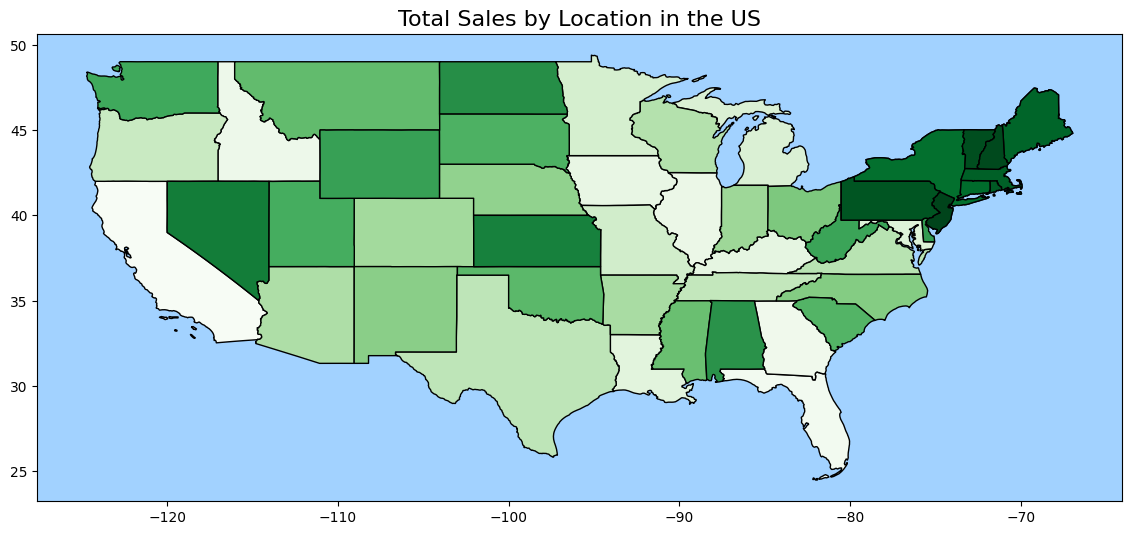

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

from osgeo import gdal
gdal.SetConfigOption('SHAPE_RESTORE_SHX', 'YES')

# Now geopandas can be accessed as gpd in this cell
states = gpd.read_file('/content/drive/MyDrive/Final Project StatProb/usa-states-census-2014.shp') # Use gpd instead of geopandas
fig, ax = plt.subplots(figsize=(14,8))
states.plot(ax=ax, edgecolor='black', linewidth=1, cmap='Greens')
plt.title('Total Sales by Location in the US', fontsize=16)
ax.set_facecolor('#a2d2ff')
#gdf.plot(ax=ax, color='red', markersize=10) #not now
plt.show()

# Analisis Keuntungan Berdasarkan Produk (Raihan --> Hikari)

### Analisis kategori Item Purchased untuk mengidentifikasi produk dengan kontribusi penjualan terbesar.

In [ ]:
import pandas as pd

# Load dataset
shopping_data = df

# Hitung total kontribusi penjualan berdasarkan 'Item Purchased'
item_sales = shopping_data.groupby('Item Purchased')['Purchase Amount (USD)'].sum().sort_values(ascending=False)

# Konversi ke DataFrame untuk visualisasi
item_sales_df = item_sales.reset_index()
item_sales_df.columns = ['Item Purchased', 'Total Sales (USD)']

# Tampilkan 10 produk teratas berdasarkan kontribusi penjualan
top_10_items = item_sales_df.head(10)

print("Top 10 Item Purchased dengan kontribusi penjualan terbesar:")
print(top_10_items)


Top 10 Item Purchased dengan kontribusi penjualan terbesar:
  Item Purchased  Total Sales (USD)
0         Blouse              10410
1          Shirt              10332
2          Dress              10320
3          Pants              10090
4        Jewelry              10010
5     Sunglasses               9649
6           Belt               9635
7          Scarf               9561
8        Sweater               9462
9         Shorts               9433


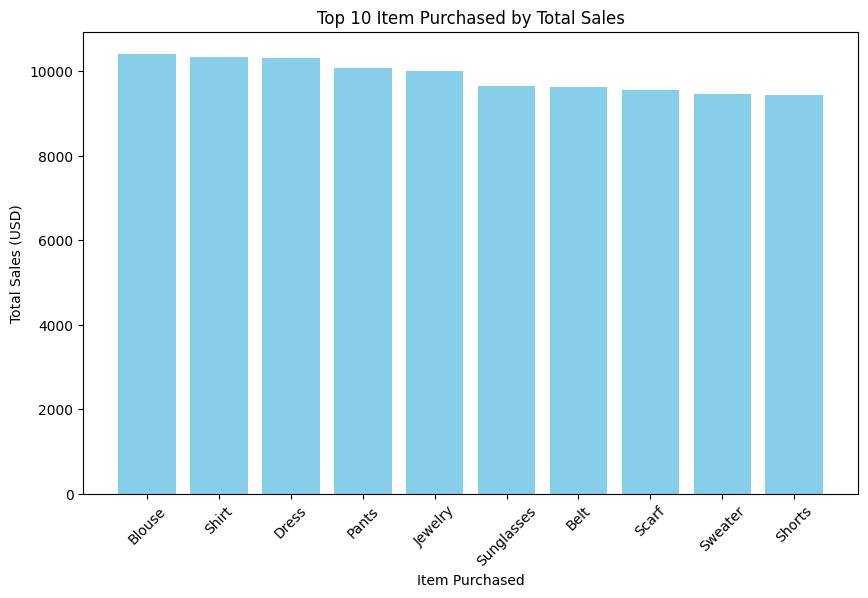

In [ ]:
import matplotlib.pyplot as plt

# Visualisasi 10 produk teratas
plt.figure(figsize=(10, 6))
plt.bar(top_10_items['Item Purchased'], top_10_items['Total Sales (USD)'], color='skyblue')
plt.xlabel('Item Purchased')
plt.ylabel('Total Sales (USD)')
plt.title('Top 10 Item Purchased by Total Sales')
plt.xticks(rotation=45)
plt.show()


### Kombinasikan dengan Purchase Amount (USD) untuk melihat produk dengan profit tertinggi.

In [ ]:
# Membuat DataFrame contoh dari data yang diunggah
file_path = '/mnt/data/shopping_trends (1).csv'
data = load_csv_with_error_handling(file_path, delimiter=',', encoding='utf-8')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Load dataset
data = pd.read_csv('/content/shopping_trends.csv')

In [ ]:
# Rangkuman rating per item
if not data.empty:
    try:
        rating_summary = data.groupby("Item Purchased").agg(
            rating_average=("Review Rating", "mean"),
            rating_count=("Review Rating", "count")
        ).reset_index()

SyntaxError: incomplete input (<ipython-input-96-cb35f131f282>, line 7)

In [ ]:
# @title perbaikan

import pandas as pd



# Rangkuman rating per item
if not data.empty:
    try:
        rating_summary = data.groupby("Item Purchased").agg(
            rating_average=("Review Rating", "mean"),
            rating_count=("Review Rating", "count")
        ).reset_index()

        print("Rangkuman rating per item:")
        print(rating_summary)
    except Exception as e:
        print(f"Terjadi kesalahan: {e}")
else:
    print("Dataset kosong atau tidak terbaca dengan benar.")


Rangkuman rating per item:
   Item Purchased  rating_average  rating_count
0        Backpack        3.752448           143
1            Belt        3.761491           161
2          Blouse        3.683626           171
3           Boots        3.812500           144
4            Coat        3.730435           161
5           Dress        3.754819           166
6          Gloves        3.864286           140
7         Handbag        3.775163           153
8             Hat        3.806494           154
9          Hoodie        3.719205           151
10         Jacket        3.763190           163
11          Jeans        3.648387           124
12        Jewelry        3.756140           171
13          Pants        3.718713           171
14        Sandals        3.841250           160
15          Scarf        3.700000           157
16          Shirt        3.629586           169
17          Shoes        3.747333           150
18         Shorts        3.711465           157
19          S

In [ ]:
# Parameter global
global_average = rating_summary["rating_average"].mean()  # Rata-rata global
global_count = rating_summary["rating_count"].sum()       # Jumlah total rating global

In [ ]:
# Hitung Bayesian Average untuk setiap item
rating_summary["bayesian_average"] = rating_summary.apply(
    lambda row: bayesian_average(row, global_average, global_count), axis=1
)

NameError: name 'bayesian_average' is not defined

In [ ]:
# Sortir berdasarkan Bayesian Average
top_items = rating_summary.sort_values(by="bayesian_average", ascending=False)

KeyError: 'bayesian_average'

In [ ]:
import pandas as pd

def bayesian_average(row, global_avg, global_cnt):
    """
    Menghitung Bayesian Average untuk setiap baris dalam DataFrame.

    Parameters:
        row (pd.Series): Baris dari DataFrame.
        global_avg (float): Rata-rata global.
        global_cnt (int): Jumlah total rating global.
    """
    rating_avg = row["rating_average"]


# Distribution Rating (Hikari)

Kita akan menggunakan kriteria berikut untuk mengelompokkan rating:

* Buruk: Rating < 3.0
* Cukup: 3.0 ≤ Rating < 4.0
* Bagus: 4.0 ≤ Rating < 4.5
* Sangat Bagus: Rating ≥ 4.5

Berikut implementasi dalam Python:

In [ ]:
stats = df.describe()

stats

stats['Review Rating']

,Review Rating
count,3900.000000
mean,3.749949
std,0.716223
min,2.500000
25%,3.100000
50%,3.700000
75%,4.400000
max,5.000000


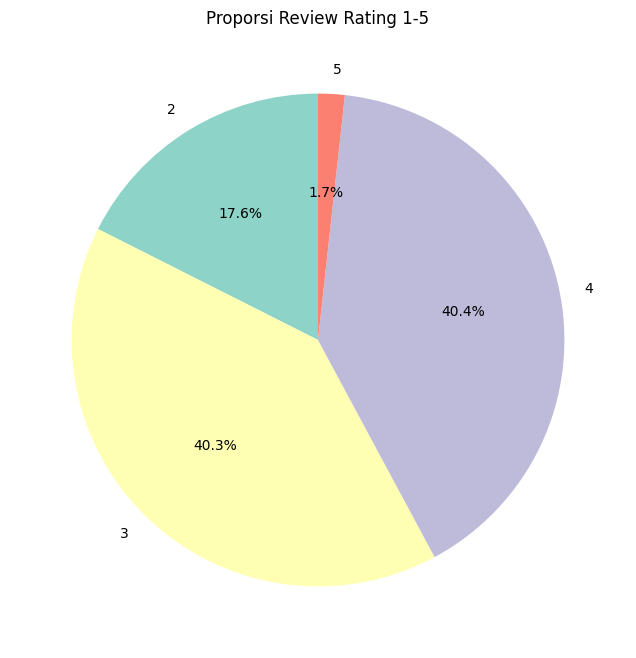

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('/content/shopping_trends.csv')

# Filter hanya untuk rating integer 1-5
filtered_data = data['Review Rating'].dropna().astype(int)
filtered_data = filtered_data[filtered_data.isin([1, 2, 3, 4, 5])]

# Hitung jumlah setiap rating
rating_counts = filtered_data.value_counts().sort_index()

# Membuat diagram lingkaran
plt.figure(figsize=(8, 8))
plt.pie(
    rating_counts,
    labels=rating_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Set3.colors
)
plt.title('Proporsi Review Rating 1-5')
plt.show()


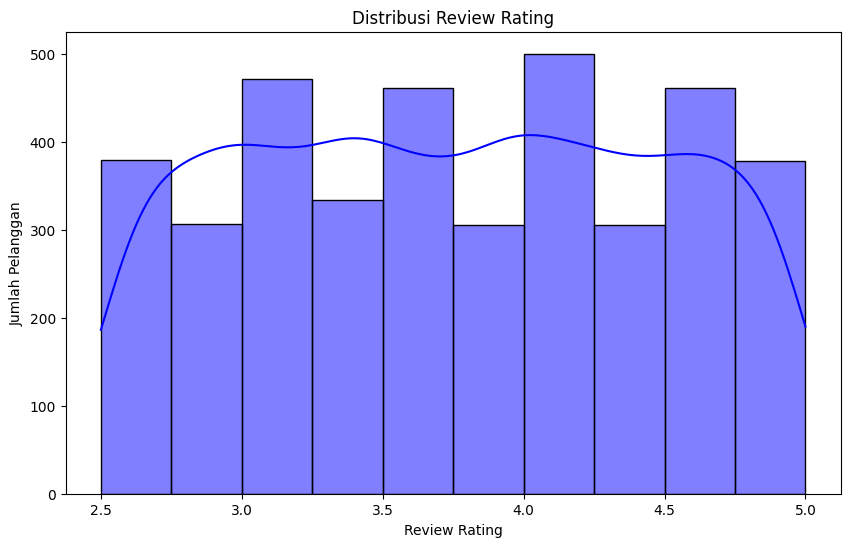

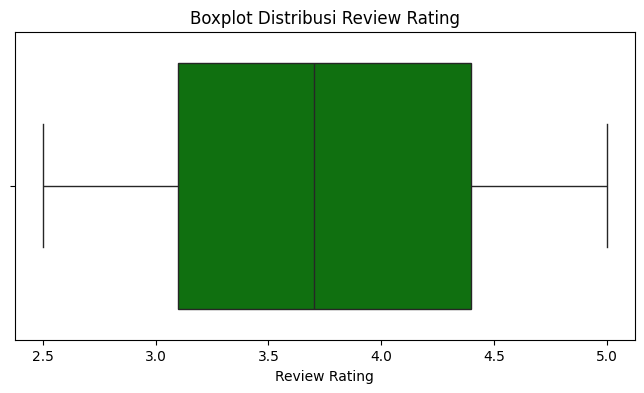

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Load dataset
data = pd.read_csv('/content/shopping_trends.csv')

# Plot histogram untuk distribusi rating
plt.figure(figsize=(10, 6))
sns.histplot(data['Review Rating'], bins=10, kde=True, color='blue')
plt.title('Distribusi Review Rating')
plt.xlabel('Review Rating')
plt.ylabel('Jumlah Pelanggan')
plt.show()


# Plot boxplot untuk distribusi rating
plt.figure(figsize=(8, 4))
sns.boxplot(x=data['Review Rating'], color='green')
plt.title('Boxplot Distribusi Review Rating')
plt.xlabel('Review Rating')
plt.show()


Jumlah Pelanggan Berdasarkan Kategori Rating:
Rating Category
Buruk            685
Cukup           1571
Bagus            805
Sangat Bagus     839
Name: count, dtype: int64


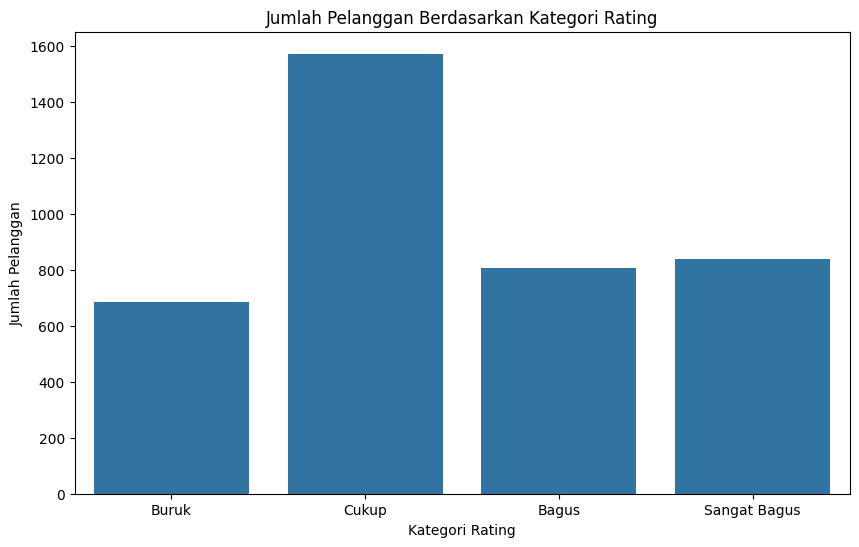


Proporsi Pelanggan Berdasarkan Kategori Rating (%):
Rating Category
Buruk           17.564103
Cukup           40.282051
Bagus           20.641026
Sangat Bagus    21.512821
Name: count, dtype: float64


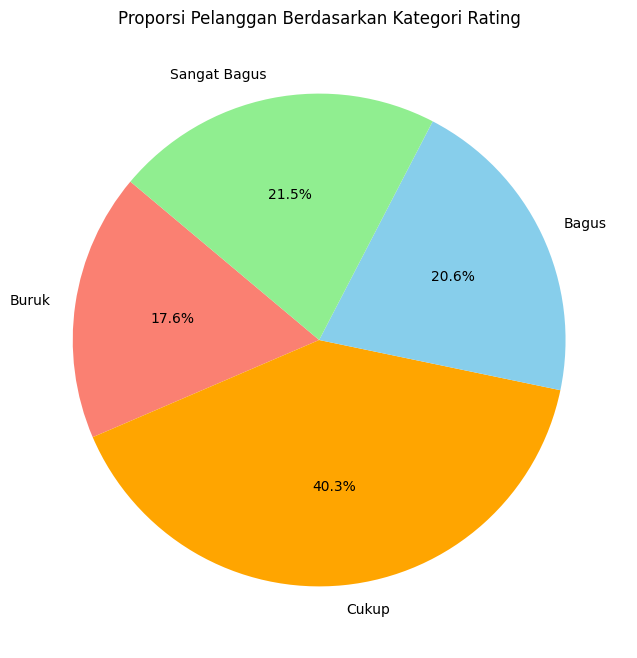

In [ ]:
# @title Proportion Rating

def categorize_rating(rating):
    if rating < 3.0:
        return "Buruk"
    elif 3.0 <= rating < 4.0:
        return "Cukup"
    elif 4.0 <= rating < 4.5:
        return "Bagus"
    else:
        return "Sangat Bagus"

# Tambahkan kolom baru untuk kategori rating
data['Rating Category'] = data['Review Rating'].apply(categorize_rating)

# Pastikan semua kategori muncul meskipun tidak ada datanya
categories = ["Buruk", "Cukup", "Bagus", "Sangat Bagus"]
category_counts = data['Rating Category'].value_counts().reindex(categories, fill_value=0)

# Hitung proporsi pelanggan
category_percentage = (category_counts / len(data)) * 100

# **Jumlah Pelanggan Berdasarkan Kategori**
print("Jumlah Pelanggan Berdasarkan Kategori Rating:")
print(category_counts)

# Visualisasi Bar Chart (Jumlah Pelanggan)
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Jumlah Pelanggan Berdasarkan Kategori Rating')
plt.xlabel('Kategori Rating')
plt.ylabel('Jumlah Pelanggan')
plt.show()

# **Proporsi Pelanggan Berdasarkan Kategori**
print("\nProporsi Pelanggan Berdasarkan Kategori Rating (%):")
print(category_percentage)

# Visualisasi Pie Chart (Proporsi Pelanggan)
plt.figure(figsize=(8, 8))
category_counts.plot.pie(autopct='%1.1f%%', startangle=140, colors=['salmon', 'orange', 'skyblue', 'lightgreen'])
plt.title('Proporsi Pelanggan Berdasarkan Kategori Rating')
plt.ylabel('')
plt.show()

Dari grafik yang ditampilkan, dapat disimpulkan bahwa distribusi review rating pelanggan pada dataset Shopping Trends cukup merata, dengan sebagian besar rating berada dalam kategori sedang hingga tinggi (sekitar 3.0 hingga 4.5). **Beberapa poin penting yang bisa diambil:**


1.   Nilai rating berada dalam rentang 2.5 hingga 5.0, yang merupakan range penuh dari rating yang tersedia. Tidak ada nilai outlier yang terlihat di boxplot tersebut, sehingga data review dapat dianggap bersih dan representatif.
2.   Rating Rendah (di bawah 3.0): Masih ada sejumlah pelanggan yang memberikan rating rendah (di bawah 3.0), meskipun jumlahnya tidak terlalu signifikan dibandingkan dengan rating yang lebih tinggi.
3.   Lonjakan di Rating 4.0 hingga 4.5: Terdapat sedikit lonjakan jumlah pelanggan pada rating 4.0 hingga 4.5, yang mungkin menandakan pengalaman pelanggan yang lebih memuaskan pada layanan atau produk tertentu.

**Implikasi Bisnis:**
1.  Tingkatkan Kualitas Layanan: Fokus pada analisis pelanggan yang memberikan rating di bawah 3.0 untuk menemukan aspek yang perlu diperbaiki.
2.  Pertahankan Kualitas: Pada rating tinggi (4.0 ke atas), penting untuk menjaga standar kualitas layanan agar pelanggan yang puas tetap loyal.
3.  Analisis Mendalam: Hubungkan rating dengan faktor lain seperti metode pembayaran, kategori produk, atau lokasi untuk menemukan penyebab utama tingkat kepuasan atau ketidakpuasan.

In [ ]:
# Menampilkan data statistik
stats = df.describe()

stats

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [ ]:
print(df.dtypes)


Customer ID                   int64
Age                           int64
Gender                       object
Item Purchased               object
Category                     object
Purchase Amount (USD)         int64
Location                     object
Size                         object
Color                        object
Season                       object
Review Rating               float64
Subscription Status          object
Payment Method               object
Shipping Type                object
Discount Applied             object
Promo Code Used              object
Previous Purchases            int64
Preferred Payment Method     object
Frequency of Purchases       object
dtype: object


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

# 1. Membaca dataset
df = pd.read_csv('shopping_trends.csv')  # Ganti nama file sesuai dataset Anda

# 2. Pisahkan fitur dan target
X = df.drop(columns=['Review Rating'])  # Ganti dengan nama kolom rating di dataset Anda
y = df['Review Rating']  # Kolom rating sebagai target

# 3. Pra-pemrosesan (encoding untuk kolom kategorikal)
categorical_cols = X.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(sparse_output=False) # Changed 'sparse' to 'sparse_output'
encoded_categorical = pd.DataFrame(encoder.fit_transform(X[categorical_cols]), columns=encoder.get_feature_names_out())
X = pd.concat([X.drop(columns=categorical_cols), encoded_categorical], axis=1)

# 4. Membagi data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Melatih model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# 6. Prediksi dan evaluasi
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.5524593115384616
R-squared: -0.013202451367200885


#Analisis Korelasi (Bagian Mamet)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Baca file CSV
file_path = '/shopping_trends.csv'
df = pd.read_csv(file_path)

# Menampilkan tabel
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


In [ ]:
# Bagian 2: Pratinjau dan Informasi Dataset
# Menampilkan informasi dasar
print("Informasi Dataset:")
print(df.info())

print("\nDeskripsi Data:")
print(df.describe())

# Menampilkan beberapa baris pertama
print("\nPratinjau Data:")
print(df.head())


Informasi Dataset:


NameError: name 'df' is not defined

In [ ]:
# Bagian 3: Analisis Korelasi
# Memilih kolom numerik saja
df_numeric = df.select_dtypes(include=['number'])

# Korelasi Pearson
pearson_corr = df_numeric.corr(method='pearson')
print("\nKorelasi Pearson:")
print(pearson_corr)

# Korelasi Spearman
spearman_corr = df_numeric.corr(method='spearman')
print("\nKorelasi Spearman:")
print(spearman_corr)



Korelasi Pearson:
                       Customer ID       Age  Purchase Amount (USD)  \
Customer ID               1.000000 -0.004079               0.011048   
Age                      -0.004079  1.000000              -0.010424   
Purchase Amount (USD)     0.011048 -0.010424               1.000000   
Review Rating             0.001343 -0.021949               0.030776   
Previous Purchases       -0.039159  0.040445               0.008063   

                       Review Rating  Previous Purchases  
Customer ID                 0.001343           -0.039159  
Age                        -0.021949            0.040445  
Purchase Amount (USD)       0.030776            0.008063  
Review Rating               1.000000            0.004229  
Previous Purchases          0.004229            1.000000  

Korelasi Spearman:
                       Customer ID       Age  Purchase Amount (USD)  \
Customer ID               1.000000 -0.004190               0.011185   
Age                      -0.004190  1.

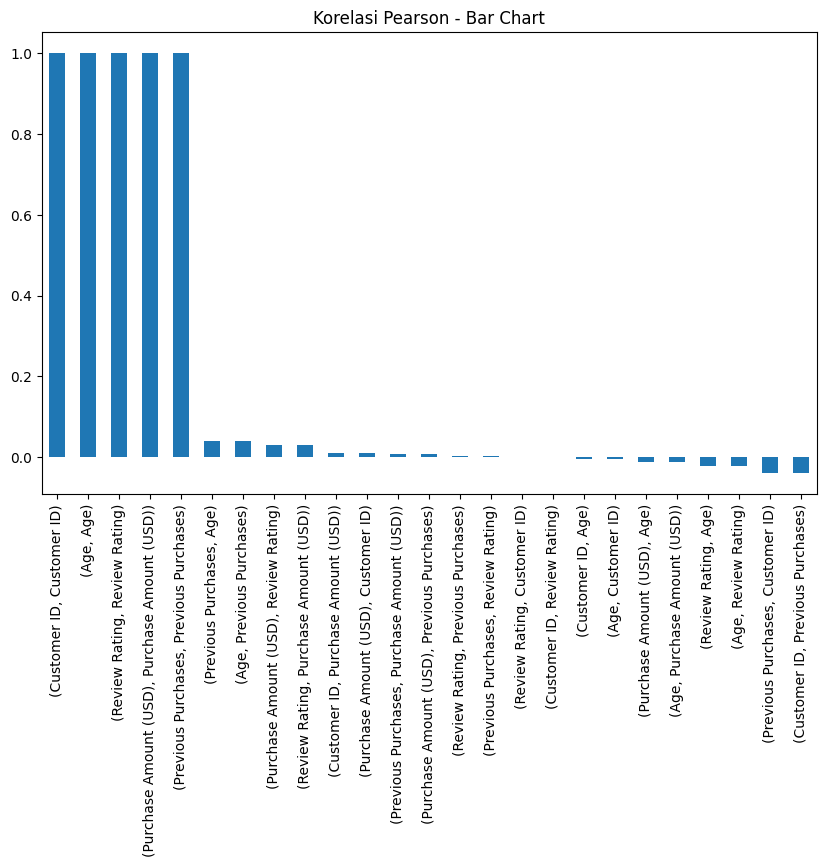

In [ ]:
# Korelasi Pearson dalam bentuk Bar Chart
pearson_corr_unstacked = pearson_corr.unstack().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
pearson_corr_unstacked.plot(kind='bar')
plt.title('Korelasi Pearson - Bar Chart')
plt.show()

In [ ]:
# @title Spearman vs Pearson
import pandas as pd
from scipy.stats import pearsonr, spearmanr

def calculate_correlations(file_path):
    # Load the df


    # Identify numeric and categorical columns
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    categorical_columns = df.select_dtypes(include=['object']).columns

    # Initialize a dictionary to store correlation results
    correlation_results = {
        'Pearson': [],
        'Spearman': []
    }

    # Calculate Pearson and Spearman correlations for numeric columns with 'Review Rating'
    if 'Review Rating' in numeric_columns:
        for col in numeric_columns:
            if col != 'Review Rating':
                pearson_corr, pearson_p = pearsonr(df[col], df['Review Rating'])
                spearman_corr, spearman_p = spearmanr(df[col], df['Review Rating'])
                correlation_results['Pearson'].append((col, pearson_corr, pearson_p))
                correlation_results['Spearman'].append((col, spearman_corr, spearman_p))

    # Encode categorical columns to numeric for Spearman correlation
    encoded_dataset = df.copy()
    encoded_dataset[categorical_columns] = encoded_dataset[categorical_columns].apply(
        lambda col: col.astype('category').cat.codes
    )

    # Calculate Spearman correlation for encoded categorical columns
    for col in categorical_columns:
        spearman_corr, spearman_p = spearmanr(encoded_dataset[col], encoded_dataset['Review Rating'])
        correlation_results['Spearman'].append((col, spearman_corr, spearman_p))

    return correlation_results

def summarize_results(correlation_results):
    summary = """Summary of Correlations:\n\n"""
    for method, correlations in correlation_results.items():
        summary += f"{method} Correlations:\n"
        for col, corr_value, p_value in correlations:
            significance = "significant" if p_value < 0.05 else "not significant"
            summary += (f"- {col}: Correlation = {corr_value:.3f}, P-value = {p_value:.3e} "
                        f"({significance})\n")
        summary += "\n"
    return summary

# Usage example
file_path = '/shopping_trends.csv'  # Replace with your df file path
results = calculate_correlations(file_path)

# Display results and summary
for method, correlations in results.items():
    print(f"\n{method} Correlations:")
    for col, corr_value, p_value in correlations:
        print(f"{col}: Correlation = {corr_value:.3f}, P-value = {p_value:.3e}")

summary = summarize_results(results)
print(summary)



Pearson Correlations:
Customer ID: Correlation = 0.001, P-value = 9.332e-01
Age: Correlation = -0.022, P-value = 1.705e-01
Purchase Amount (USD): Correlation = 0.031, P-value = 5.463e-02
Previous Purchases: Correlation = 0.004, P-value = 7.918e-01

Spearman Correlations:
Customer ID: Correlation = 0.001, P-value = 9.406e-01
Age: Correlation = -0.022, P-value = 1.702e-01
Purchase Amount (USD): Correlation = 0.030, P-value = 5.782e-02
Previous Purchases: Correlation = 0.004, P-value = 7.817e-01
Gender: Correlation = 0.008, P-value = 6.049e-01
Item Purchased: Correlation = -0.004, P-value = 7.843e-01
Category: Correlation = -0.003, P-value = 8.714e-01
Location: Correlation = -0.004, P-value = 7.924e-01
Size: Correlation = 0.024, P-value = 1.281e-01
Color: Correlation = 0.027, P-value = 9.091e-02
Season: Correlation = 0.000, P-value = 9.802e-01
Subscription Status: Correlation = -0.006, P-value = 7.012e-01
Payment Method: Correlation = -0.004, P-value = 8.259e-01
Shipping Type: Correlatio

# **Korelasi Pearson**


Korelasi Pearson adalah sebuah metode statistik yang digunakan untuk mengukur dan menentukan hubungan linier antara dua variabel. Metode ini menghasilkan sebuah nilai yang disebut koefisien korelasi Pearson (sering dilambangkan sebagai r). Nilai ini memberikan indikasi seberapa kuat dan seberapa arah hubungan antara kedua variabel tersebut.

# Karakteristik Korelasi Pearson


1.  Nilai r berkisar antara -1 hingga 1:


*   r = 1: Hubungan positif sempurna (ketika satu variabel meningkat, variabel lain juga meningkat secara proporsional).
*   r = -1: Hubungan negatif sempurna (ketika satu variabel meningkat, variabel lain menurun secara proporsional).
*  r = 0: Tidak ada hubungan linier antara kedua variabel.


2.   Hubungan Linier: Korelasi Pearson hanya dapat menangkap hubungan linier. Jika hubungan antar variabel tidak linier (misalnya berbentuk kurva), nilai korelasi Pearson mungkin tidak mencerminkan hubungan tersebut secara akurat.

3. Sensitif terhadap Outlier: Kehadiran nilai ekstrim (outlier) dapat secara signifikan memengaruhi nilai korelasi Pearson.


# Rumus Korelasi Pearson
Koefisien korelasi Pearson dapat dihitung menggunakan rumus berikut:

$$
r = \frac{\sum (X_i - \bar{X})(Y_i - \bar{Y})}{\sqrt{\sum (X_i - \bar{X})^2 \sum (Y_i - \bar{Y})^2}}
$$



*   r: Nilai korelasi Pearson.
*   Xi dan Yi: Nilai data untuk variabel X dan Y.
*  X bar dan Y bar: Rata-rata dari variabel X dan Y.




# **Korelasi Spearman**

Korelasi Spearman (Spearman's rank correlation coefficient) adalah metode statistik yang digunakan untuk mengukur kekuatan dan arah hubungan antara dua variabel, terutama ketika data tidak mengikuti distribusi normal atau hubungan antara variabel tidak linier. Berbeda dengan korelasi Pearson, yang mengukur hubungan linier antar variabel, korelasi Spearman mengukur hubungan monotonik, yang berarti satu variabel cenderung meningkat atau menurun seiring perubahan variabel lainnya, meskipun hubungan tersebut tidak harus linier.

#Karakteristik Korelasi Spearman

1. Menggunakan Peringkat (Rank):
  * Korelasi Spearman didasarkan pada peringkat data (rank), bukan nilai asli. Setiap nilai dalam dataset diberi peringkat, dan korelasi dihitung berdasarkan peringkat tersebut.

2. Menguji Hubungan Monotonik:
  * Hubungan monotonik adalah hubungan di mana satu variabel cenderung bergerak ke arah tertentu (naik atau turun) saat variabel lainnya bergerak ke arah yang sama. Ini bisa berupa hubungan linier atau hubungan non-linier.

3. Tidak Sensitif terhadap Outlier:
    * Karena menggunakan peringkat, korelasi Spearman lebih tahan terhadap pengaruh outlier dibandingkan korelasi Pearson.

4. Dapat Digunakan untuk Data Ordinal:
  * Korelasi Spearman sangat berguna ketika data tidak bersifat interval atau rasio, melainkan ordinal, seperti peringkat, atau data yang memiliki distribusi yang tidak normal.



#Rumus Korelasi Spearman

$$ r_s = 1 - \frac{6 \sum d_i^2}{n(n^2 - 1)} $$


Di mana:
  * *di*  adalah selisih antara peringkat data untuk setiap pasangan nilai.
  *n adalah jumlah pasangan data.



**Perbandingan Korelasi Pearson dan Korelasi Spearman**

| Aspek                   | **Korelasi Pearson**                     | **Korelasi Spearman**                              |
|-------------------------|------------------------------------------|------------------------------------------------|
| **Tipe Data**           | Data numerik kontinu (interval/rasio)                     | Data ordinal atau numerik kontinu (bisa diberi peringkat)                    |
| **Tujuan**              | Mengukur hubungan linier antara dua variabel | Mengukur hubungan monotonik antara dua variabel |
| **Output**              | Koefisien korelasi r (-1 hingga 1)             | Koefisien korelasi rs (-1 hingga 1)                   |
| **Sensitivitas Outlier**              | Sangat sensitif terhadap outlier	             | Tidak terlalu sensitif terhadap outlier              |
| **Cara perhitungan**              | Berdasarkan nilai asli data       | Berdasarkan peringkat data |
| **Contoh Penggunaan**   | Hubungan antara tinggi badan dan berat badan | Hubungan antara peringkat atlet dan skor pertandingan |

---


**Kesimpulan**

* Gunakan Korelasi Pearson jika data numerik kontinu, terdistribusi normal, dan memiliki hubungan linier.

* Gunakan Korelasi Spearman jika data ordinal atau tidak memenuhi asumsi normalitas, serta hubungan cenderung monotonik.

# Export to PDF

In [4]:
!apt-get install pandoc
!apt-get update
!apt-get install -y texlive-xetex texlive-fonts-recommended texlive-latex-extra

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libcmark-gfm-extensions0.29.0.gfm.3 libcmark-gfm0.29.0.gfm.3 pandoc-data
Suggested packages:
  texlive-latex-recommended texlive-xetex texlive-luatex pandoc-citeproc texlive-latex-extra
  context wkhtmltopdf librsvg2-bin groff ghc nodejs php python ruby libjs-mathjax libjs-katex
  citation-style-language-styles
The following NEW packages will be installed:
  libcmark-gfm-extensions0.29.0.gfm.3 libcmark-gfm0.29.0.gfm.3 pandoc pandoc-data
0 upgraded, 4 newly installed, 0 to remove and 49 not upgraded.
Need to get 20.6 MB of archives.
After this operation, 156 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libcmark-gfm0.29.0.gfm.3 amd64 0.29.0.gfm.3-3 [115 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libcmark-gfm-extensions0.29.0.gfm.3 amd64 0.29.0.gfm.3-3 [25.1 kB]


In [ ]:
# Instal Pandoc dan LaTeX
!apt-get install pandoc
!apt-get update
!apt-get install -y texlive-xetex texlive-fonts-recommended texlive-latex-extra

# Konversi notebook (.ipynb) menjadi file Markdown
!jupyter nbconvert --to markdown fpstatprob.ipynb

# Konversi file Markdown ke PDF
!pandoc fpstatprob.md -o fpstatprob.pdf

# Download file PDF
from google.colab import files
files.download("fpstatprob.pdf")

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pandoc is already the newest version (2.9.2.1-3ubuntu2).
0 upgraded, 0 newly installed, 0 to remove and 56 not upgraded.
Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'm

FileNotFoundError: Cannot find file: fpstatprob.pdf

#Kesimpulan

# Reference

* AlexTheAnalyst. (2023, May 23). Data Cleaning in Pandas. YouTube. https://www.youtube.com/watch?v=bDhvCp3_lYw

* Data Thinkers. (2021, Jun 9). Project - 9 | Data Analysis | IMDB Movie Dataset. Youtube. https://www.youtube.com/watch?v=Asm2_qgBK48&ab_channel=DataThinkers

* JS_DataTalks. (2023, Oct 8). Visualize Geolocation from CSV File via GeoPandas. YouTube. https://www.youtube.com/watch?v=BCyt82h8JJA&ab_channel=JS_DataTalks
